# Financial Planning with APIs and Simulations

In this Challenge, you’ll create two financial analysis tools by using a single Jupyter notebook:

Part 1: A financial planner for emergencies. The members will be able to use this tool to visualize their current savings. The members can then determine if they have enough reserves for an emergency fund.

Part 2: A financial planner for retirement. This tool will forecast the performance of their retirement portfolio in 30 years. To do this, the tool will make an Alpaca API call via the Alpaca SDK to get historical price data for use in Monte Carlo simulations.

You’ll use the information from the Monte Carlo simulation to answer questions about the portfolio in your Jupyter notebook.



In [1]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the environment variables from the .env file
#by calling the load_dotenv function
load_dotenv()

True

## Part 1: Create a Financial Planner for Emergencies

### Evaluate the Cryptocurrency Wallet by Using the Requests Library

In this section, you’ll determine the current value of a member’s cryptocurrency wallet. You’ll collect the current prices for the Bitcoin and Ethereum cryptocurrencies by using the Python Requests library. For the prototype, you’ll assume that the member holds the 1.2 Bitcoins (BTC) and 5.3 Ethereum coins (ETH). To do all this, complete the following steps:

1. Create a variable named `monthly_income`, and set its value to `12000`.

2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplies.

3. Navigate the JSON response object to access the current price of each coin, and store each in a variable.

    > **Hint** Note the specific identifier for each cryptocurrency in the API JSON response. The Bitcoin identifier is `1`, and the Ethereum identifier is `1027`.

4. Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.



In [3]:
# The current number of coins for each cryptocurrency asset held in the portfolio.
btc_coins = 1.2
eth_coins = 5.3

#### Step 1: Create a variable named `monthly_income`, and set its value to `12000`.

In [4]:
# The monthly amount for the member's household income
# YOUR CODE HERE
monthly_income = 12000

#### Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [5]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

#### Step 2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.

In [6]:
# Using the Python requests library, make an API call to access the current price of BTC
btc_response = requests.get(btc_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
# YOUR CODE HERE
print(json.dumps(btc_response, indent=4, sort_keys=True))

{
    "data": {
        "1": {
            "circulating_supply": 19461537,
            "id": 1,
            "last_updated": 1692421181,
            "max_supply": 21000000,
            "name": "Bitcoin",
            "quotes": {
                "USD": {
                    "market_cap": 505973525238,
                    "percent_change_1h": 0.134773361794383,
                    "percent_change_24h": -1.1049127303294,
                    "percent_change_7d": -11.5510875154713,
                    "percentage_change_1h": 0.134773361794383,
                    "percentage_change_24h": -1.1049127303294,
                    "percentage_change_7d": -11.5510875154713,
                    "price": 25981.0,
                    "volume_24h": 20683762241
                }
            },
            "rank": 1,
            "symbol": "BTC",
            "total_supply": 19461537,
            "website_slug": "bitcoin"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurrencie

In [7]:
# Using the Python requests library, make an API call to access the current price ETH
eth_response = requests.get(eth_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
# YOUR CODE HERE
print(json.dumps(eth_response, indent = 4, sort_keys=True))

{
    "data": {
        "1027": {
            "circulating_supply": 120210036,
            "id": 1027,
            "last_updated": 1692421191,
            "max_supply": 120210036,
            "name": "Ethereum",
            "quotes": {
                "USD": {
                    "market_cap": 199889467540,
                    "percent_change_1h": 0.196000484515328,
                    "percent_change_24h": -0.400896714530785,
                    "percent_change_7d": -10.0281024855019,
                    "percentage_change_1h": 0.196000484515328,
                    "percentage_change_24h": -0.400896714530785,
                    "percentage_change_7d": -10.0281024855019,
                    "price": 1661.92,
                    "volume_24h": 11722061543
                }
            },
            "rank": 2,
            "symbol": "ETH",
            "total_supply": 120210036,
            "website_slug": "ethereum"
        }
    },
    "metadata": {
        "error": null,
        "num_

#### Step 3: Navigate the JSON response object to access the current price of each coin, and store each in a variable.

In [8]:
# Navigate the BTC response object to access the current price of BTC
btc_price = btc_response["data"]["1"]["quotes"]["USD"]["price"]

# Print the current price of BTC
# YOUR CODE HERE
btc_price

25981.0

In [9]:
# Navigate the BTC response object to access the current price of ETH
eth_price = eth_response["data"]["1027"]["quotes"]["USD"]["price"]

# Print the current price of ETH
# YOUR CODE HERE
eth_price

1661.92

### Step 4: Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.

In [10]:
# Compute the current value of the BTC holding 
btc_value = btc_coins*btc_price

# Print current value of your holding in BTC
# YOUR CODE HERE
btc_value

31177.199999999997

In [11]:
# Compute the current value of the ETH holding 
eth_value = eth_coins*eth_price

# Print current value of your holding in ETH
# YOUR CODE HERE
eth_value

8808.176

In [12]:
# Compute the total value of the cryptocurrency wallet
# Add the value of the BTC holding to the value of the ETH holding
total_crypto_wallet = btc_value + eth_value

# Print current cryptocurrency wallet balance
# YOUR CODE HERE
total_crypto_wallet

39985.376

### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

In this section, you’ll determine the current value of a member’s stock and bond holdings. You’ll make an API call to Alpaca via the Alpaca SDK to get the current closing prices of the SPDR S&P 500 ETF Trust (ticker: SPY) and of the iShares Core US Aggregate Bond ETF (ticker: AGG). For the prototype, assume that the member holds 110 shares of SPY, which represents the stock portion of their portfolio, and 200 shares of AGG, which represents the bond portion. To do all this, complete the following steps:

1. In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

2. Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

3. Set the following parameters for the Alpaca API call:

    - `tickers`: Use the tickers for the member’s stock and bond holdings.

    - `timeframe`: Use a time frame of one day.

    - `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.

4. Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

5. Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

6. Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.


#### Review the total number of shares held in both (SPY) and (AGG).

In [13]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
spy_shares = 110
agg_shares = 200


#### Step 1: In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

#### Step 2: Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [14]:
# Set the variables for the Alpaca API and secret keys
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
# Create the Alpaca tradeapi.REST object
# YOUR CODE HERE
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2")

#### Step 3: Set the following parameters for the Alpaca API call:

- `tickers`: Use the tickers for the member’s stock and bond holdings.

- `timeframe`: Use a time frame of one day.

- `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.


In [15]:
# Set the tickers for both the bond and stock portion of the portfolio
# YOUR CODE HERE
tickers = ["SPY", "AGG"]
# Set timeframe to 1Day
# YOUR CODE HERE
timeframe = "1Day"
# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# This will give you the closing price of the previous trading day
# Alternatively you can use a start and end date of 2020-08-07
# YOUR CODE HERE
# YOUR CODE HERE
start_date = pd.Timestamp("2023-08-18", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2023-08-18", tz="America/New_York").isoformat()

#### Step 4: Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

In [16]:
# Use the Alpaca get_bars function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame
# YOUR CODE HERE
prices_df = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end= end_date).df
# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE
spy = prices_df[prices_df["symbol"] == "SPY"].drop("symbol", axis = 1)
agg = prices_df[prices_df["symbol"] == "AGG"].drop("symbol", axis = 1)
# Concatenate the ticker DataFrames
# YOUR CODE HERE
prices_df = pd.concat([spy,agg], keys=["SPY","AGG"], axis = 1)
# Review the first 5 rows of the Alpaca DataFrame
# YOUR CODE HERE
prices_df.head()

SPY                                   \
                             open    high     low  close    volume   
timestamp                                                            
2023-08-18 04:00:00+00:00  433.37  437.57  433.01  436.5  98435786   

                                                     AGG                  \
                          trade_count        vwap   open     high    low   
timestamp                                                                  
2023-08-18 04:00:00+00:00      632838  435.554075  95.47  95.7475  95.43   

                                                                  
                           close   volume trade_count       vwap  
timestamp                                                         
2023-08-18 04:00:00+00:00  95.62  6022506       22599  95.641482

#### Step 5: Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

In [17]:
# Access the closing price for AGG from the Alpaca DataFrame
# Converting the value to a floating point number
agg_close_price = float(prices_df["AGG"]["close"])

# Print the AGG closing price
# YOUR CODE HERE
agg_close_price

95.62

In [18]:
# Access the closing price for SPY from the Alpaca DataFrame
# Converting the value to a floating point number
spy_close_price = float(prices_df["SPY"]["close"])

# Print the SPY closing price
# YOUR CODE HERE
spy_close_price

436.5

#### Step 6: Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.

In [19]:
# Calculate the current value of the bond portion of the portfolio
agg_value = agg_shares * agg_close_price

# Print the current value of the bond portfolio
# YOUR CODE HERE
agg_value

19124.0

In [20]:
# Calculate the current value of the stock portion of the portfolio
spy_value = spy_shares * spy_close_price

# Print the current value of the stock portfolio
# YOUR CODE HERE
spy_value

48015.0

In [21]:
# Calculate the total value of the stock and bond portion of the portfolio
total_stocks_bonds = spy_value + agg_value

# Print the current balance of the stock and bond portion of the portfolio
# YOUR CODE HERE
total_stocks_bonds

67139.0

In [22]:
# Calculate the total value of the member's entire savings portfolio
# Add the value of the cryptocurrency walled to the value of the total stocks and bonds
total_portfolio = total_crypto_wallet + total_stocks_bonds

# Print current entire savings portfolio balance
# YOUR CODE HERE
total_portfolio

107124.37599999999

### Evaluate the Emergency Fund

In this section, you’ll use the valuations for the cryptocurrency wallet and for the stock and bond portions of the portfolio to determine if the credit union member has enough savings to build an emergency fund into their financial plan. To do this, complete the following steps:

1. Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

2. Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

    - `savings_data`: Use the list that you just created.

    - `columns`: Set this parameter equal to a Python list with a single value called `amount`.

    - `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.

3. Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

4. Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

    1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of $12000. (You set this earlier in Part 1).

    2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

        1. If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

        2. Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

        3. Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


#### Step 1: Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [23]:
# Consolidate financial assets data into a Python list
# YOUR CODE HERE
savings_data = [total_crypto_wallet, total_stocks_bonds]
# Review the Python list savings_data
# YOUR CODE HERE
savings_data

[39985.376, 67139.0]

#### Step 2: Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

- `savings_data`: Use the list that you just created.

- `columns`: Set this parameter equal to a Python list with a single value called `amount`.

- `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.


In [24]:
# Create a Pandas DataFrame called savings_df 
# YOUR CODE HERE
savings_df = pd.DataFrame(
    savings_data,
    columns = ["amount"],
    index = ["crypto", "stock/bond"])
# Display the savings_df DataFrame
# YOUR CODE HERE
savings_df

,amount
crypto,39985.376
stock/bond,67139.000


#### Step 3: Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

<Axes: title={'center': 'Composition of Portfolio'}, ylabel='amount'>

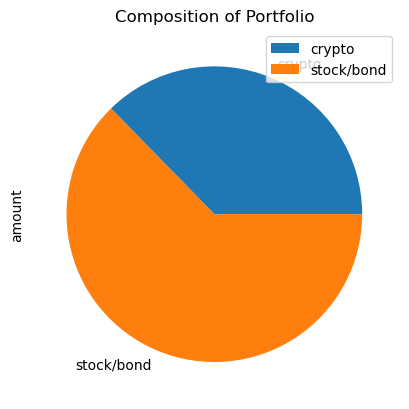

In [25]:
# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart
# YOUR CODE HERE
savings_df.plot.pie(y="amount",
                    title = "Composition of Portfolio")


#### Step 4: Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

Step 1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

Step 2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


##### Step 4-1: Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

In [26]:
# Create a variable named emergency_fund_value
# YOUR CODE HERE
emergency_fund_value = monthly_income * 3

emergency_fund_value

36000

##### Step 4-2: Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)

In [27]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:
# YOUR CODE HERE
if (total_portfolio > emergency_fund_value):
    print("Congratulations your porfolio balance more than meets the minimum required amount for an emergency fund.")
# YOUR CODE HERE
elif (total_portfolio == emergency_fund_value):
    print("Congratulations your porfolio balance just met the minimum required amount for an emergency fund.")
# YOUR CODE HERE
else:
    print(f"You are close to meeting your financial goals. You need to save ${emergency_fund_value - total_portfolio : .02f} to"
          f" meet the minimum agreed upon emergency funds amount.")

Congratulations your porfolio balance more than meets the minimum required amount for an emergency fund.


## Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation

In this section, you’ll use the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio. To do this, complete the following steps:

1. Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

2. Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.The following image shows the overlay line plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the resulting plot.](Images/5-4-monte-carlo-line-plot.png)

3. Plot the probability distribution of the Monte Carlo simulation. Plot the probability distribution of the Monte Carlo simulation. The following image shows the histogram plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the histogram plot.](Images/5-4-monte-carlo-histogram.png)

4. Generate the summary statistics for the Monte Carlo simulation.



#### Step 1: Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [28]:
# Set start and end dates of 3 years back from your current date
# Alternatively, you can use an end date of 2020-08-07 and work 3 years back from that date 
# YOUR CODE HERE
start_mc = pd.Timestamp("2020-08-18", tz = "America/New_York").isoformat()
# YOUR CODE HERE
end_mc = pd.Timestamp("2023-08-18", tz = "America/New_York").isoformat()

In [29]:
# Use the Alpaca get_bars function to make the API call to get the 3 years worth of pricing data
# The tickers and timeframe parameters should have been set in Part 1 of this activity 
# The start and end dates should be updated with the information set above
# Remember to add the df property to the end of the call so the response is returned as a DataFrame
# YOUR CODE HERE
prices_mc = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_mc,
    end = end_mc,
    limit = 2000).df
# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE
spy = prices_mc[prices_mc["symbol"] == "SPY"].drop("symbol", axis = 1)
agg = prices_mc[prices_mc["symbol"] == "AGG"].drop("symbol", axis = 1)
# Concatenate the ticker DataFrames
# YOUR CODE HERE
prices_mc = pd.concat([spy,agg], axis=1, keys= ["SPY", "AGG"])
# Display both the first and last five rows of the DataFrame
# YOUR CODE HERE
# YOUR CODE HERE
display(prices_mc.head())
display(prices_mc.tail())

SPY                                       \
                             open    high       low    close    volume   
timestamp                                                                
2020-08-18 04:00:00+00:00  338.34  339.10  336.6100  338.595  38729908   
2020-08-19 04:00:00+00:00  339.05  339.61  336.6200  337.130  68054355   
2020-08-20 04:00:00+00:00  335.36  338.80  335.2200  338.310  42207826   
2020-08-21 04:00:00+00:00  337.92  339.72  337.5500  339.450  55106628   
2020-08-24 04:00:00+00:00  342.12  343.00  339.4504  342.900  48588662   

                                                        AGG                  \
                          trade_count        vwap      open    high     low   
timestamp                                                                     
2020-08-18 04:00:00+00:00      213168  338.322479  118.4279  118.60  118.42   
2020-08-19 04:00:00+00:00      321017  338.207759  118.6500  118.70  118.34   
2020-08-20 04:00:00+00:00      271504  337.483134  118.5800  118.71  118.56   
2020-08-21 04:00:00+00:00      270817  338.773083  118.7400  118.76  118.55   
2020-08-24 04:00:00+00:00      278775  341.935714  118.7200  118.82  118.60   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2020-08-18 04:00:00+00:00  118.53  4765813       14791  118.531748  
2020-08-19 04:00:00+00:00  118.35  4540992       14358  118.517708  
2020-08-20 04:00:00+00:00  118.56  4487506       13490  118.608076  
2020-08-21 04:00:00+00:00  118.68  6373275       13830  118.668349  
2020-08-24 04:00:00+00:00  118.63  4620863       17999  118.670385

SPY                                    \
                             open    high     low   close    volume   
timestamp                                                             
2023-08-14 04:00:00+00:00  444.70  448.11  444.38  448.11  47877271   
2023-08-15 04:00:00+00:00  446.27  446.64  442.30  442.89  75737936   
2023-08-16 04:00:00+00:00  442.46  444.18  439.53  439.64  80106304   
2023-08-17 04:00:00+00:00  441.16  441.43  435.75  436.29  94554366   
2023-08-18 04:00:00+00:00  433.37  437.57  433.01  436.50  98435786   

                                                     AGG                  \
                          trade_count        vwap   open     high    low   
timestamp                                                                  
2023-08-14 04:00:00+00:00      405059  446.727325  95.98  96.2200  95.83   
2023-08-15 04:00:00+00:00      541508  444.260791  95.81  96.0700  95.74   
2023-08-16 04:00:00+00:00      568998  441.624976  95.76  95.9300  95.45   
2023-08-17 04:00:00+00:00      572648  438.331604  95.50  95.5455  95.21   
2023-08-18 04:00:00+00:00      632838  435.554075  95.47  95.7475  95.43   

                                                                  
                           close   volume trade_count       vwap  
timestamp                                                         
2023-08-14 04:00:00+00:00  96.00  7901459       20238  96.031807  
2023-08-15 04:00:00+00:00  95.74  6522467       26064  95.882192  
2023-08-16 04:00:00+00:00  95.51  8964587       30939  95.645764  
2023-08-17 04:00:00+00:00  95.41  7633417       27623  95.338228  
2023-08-18 04:00:00+00:00  95.62  6022506       22599  95.641482

#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [30]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split 40% to AGG and 60% to SPY.
# Run 500 samples.
# YOUR CODE HERE
mc_traditional = MCSimulation(
    portfolio_data=prices_mc,
    weights = [.60, .40],
    num_simulation= 500,
    num_trading_days= 252*30)
# Review the simulation input data
# YOUR CODE HERE
mc_traditional.portfolio_data.head()

SPY                                       \
                             open    high       low    close    volume   
timestamp                                                                
2020-08-18 04:00:00+00:00  338.34  339.10  336.6100  338.595  38729908   
2020-08-19 04:00:00+00:00  339.05  339.61  336.6200  337.130  68054355   
2020-08-20 04:00:00+00:00  335.36  338.80  335.2200  338.310  42207826   
2020-08-21 04:00:00+00:00  337.92  339.72  337.5500  339.450  55106628   
2020-08-24 04:00:00+00:00  342.12  343.00  339.4504  342.900  48588662   

                                                                     AGG  \
                          trade_count        vwap daily_return      open   
timestamp                                                                  
2020-08-18 04:00:00+00:00      213168  338.322479          NaN  118.4279   
2020-08-19 04:00:00+00:00      321017  338.207759    -0.004327  118.6500   
2020-08-20 04:00:00+00:00      271504  337.483134     0.003500  118.5800   
2020-08-21 04:00:00+00:00      270817  338.773083     0.003370  118.7400   
2020-08-24 04:00:00+00:00      278775  341.935714     0.010163  118.7200   

                                                                        \
                             high     low   close   volume trade_count   
timestamp                                                                
2020-08-18 04:00:00+00:00  118.60  118.42  118.53  4765813       14791   
2020-08-19 04:00:00+00:00  118.70  118.34  118.35  4540992       14358   
2020-08-20 04:00:00+00:00  118.71  118.56  118.56  4487506       13490   
2020-08-21 04:00:00+00:00  118.76  118.55  118.68  6373275       13830   
2020-08-24 04:00:00+00:00  118.82  118.60  118.63  4620863       17999   

                                                    
                                 vwap daily_return  
timestamp                                           
2020-08-18 04:00:00+00:00  118.531748          NaN  
2020-08-19 04:00:00+00:00  118.517708    -0.001519  
2020-08-20 04:00:00+00:00  118.608076     0.001774  
2020-08-21 04:00:00+00:00  118.668349     0.001012  
2020-08-24 04:00:00+00:00  118.670385    -0.000421

In [31]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE
mc_traditional.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.007829,1.004573,0.988995,1.003238,1.002004,1.002296,0.990685,0.999086,0.998495,0.996241,...,0.996691,0.984366,1.010290,0.995497,1.005188,0.999691,0.988522,0.997016,0.994866,0.986421
2,1.008944,0.996267,1.004305,0.991074,0.984280,1.002679,0.995478,1.001624,1.003332,0.995717,...,0.992740,0.988250,1.007367,1.002189,1.005356,1.004007,0.984628,1.005543,0.992174,0.979882
3,1.021429,0.990673,1.002297,0.981766,0.989506,1.001416,0.999782,1.016815,1.004352,1.008579,...,0.998647,0.983544,0.997491,1.006014,1.014113,1.003266,0.985911,1.007646,1.004266,0.980561
4,1.009234,0.992271,1.004323,0.972925,0.975432,0.998040,0.991925,1.021903,1.000375,1.010590,...,1.007161,0.980547,0.988911,1.010626,1.019315,1.002891,0.986340,1.022443,1.006270,0.974393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,2.430342,2.370957,1.466331,0.853172,1.206585,2.069067,2.587640,5.153337,1.851314,3.038045,...,1.151332,2.112385,2.317428,0.707595,1.192407,1.999114,3.702650,3.307904,3.167058,2.026727
7557,2.457878,2.365960,1.481478,0.848702,1.205688,2.080777,2.574592,5.165788,1.841534,3.065529,...,1.156024,2.131739,2.312346,0.711555,1.187500,1.991353,3.712799,3.302475,3.194869,2.014777
7558,2.442017,2.393048,1.467663,0.849560,1.210403,2.078758,2.598689,5.252169,1.848644,3.067377,...,1.151932,2.131656,2.288505,0.711760,1.181499,2.011650,3.727275,3.324546,3.181204,2.020434
7559,2.479733,2.421768,1.439911,0.848366,1.209273,2.093079,2.607645,5.279088,1.851618,3.049458,...,1.156430,2.150836,2.292299,0.709439,1.172732,2.015270,3.716772,3.287364,3.171866,2.030820


<Axes: title={'center': '500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

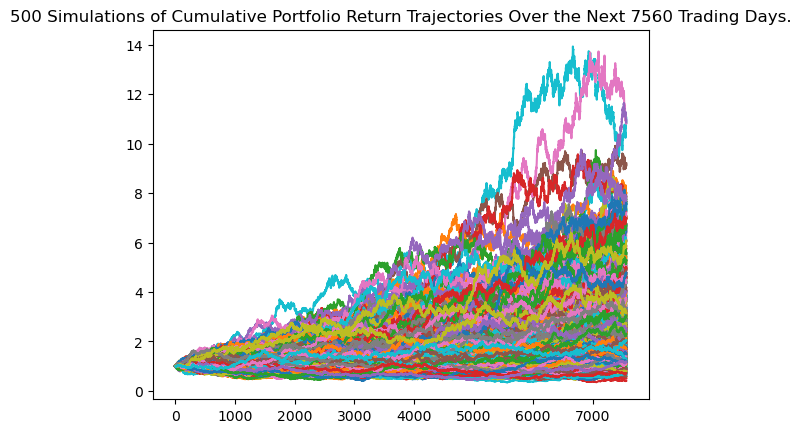

In [32]:
# Visualize the 30-year Monte Carlo simulation by creating an
# overlay line plot
# YOUR CODE HERE
mc_traditional.plot_simulation()

#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

<Axes: title={'center': 'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

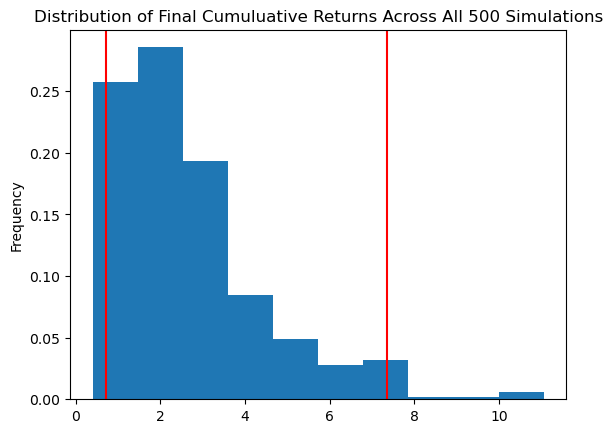

In [33]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram
# YOUR CODE HERE
mc_traditional.plot_distribution()

#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [34]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable
# YOUR CODE HERE
mc_traditional_summary = mc_traditional.summarize_cumulative_return()

# Review the 30-year Monte Carlo summary statistics
# YOUR CODE HERE
mc_traditional_summary

count           500.000000
mean              2.684188
std               1.759689
min               0.408139
25%               1.414612
50%               2.184547
75%               3.251378
max              11.051516
95% CI Lower      0.729410
95% CI Upper      7.348243
Name: 7560, dtype: float64

### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?


In [35]:
# Print the current balance of the stock and bond portion of the members portfolio
# YOUR CODE HERE
total_stocks_bonds

67139.0

In [36]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_thirty_cumulative_return = total_stocks_bonds * mc_traditional_summary[8]
ci_upper_thirty_cumulative_return = total_stocks_bonds * mc_traditional_summary[9]

# Print the result of your calculations
# YOUR CODE HERE
print(f"There is a 95% chance that current {total_stocks_bonds: .02f} of stock/bond in the portfolio"
      f" with a 60% weight in SPY and 40%  weight in AGG over the next 30 years will end within in the range of"
      f" ${ci_lower_thirty_cumulative_return: .02f} and ${ci_upper_thirty_cumulative_return: .02f}.")

There is a 95% chance that current  67139.00 of stock/bond in the portfolio with a 60% weight in SPY and 40%  weight in AGG over the next 30 years will end within in the range of $ 48971.83 and $ 493353.70.


### Forecast Cumulative Returns in 10 Years

The CTO of the credit union is impressed with your work on these planning tools but wonders if 30 years is a long time to wait until retirement. So, your next task is to adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier.

For this new Monte Carlo simulation, do the following: 

- Forecast the cumulative returns for 10 years from now. Because of the shortened investment horizon (30 years to 10 years), the portfolio needs to invest more heavily in the riskier asset&mdash;that is, stock&mdash;to help accumulate wealth for retirement. 

- Adjust the weights of the retirement portfolio so that the composition for the Monte Carlo simulation consists of 20% bonds and 80% stocks. 

- Run the simulation over 500 samples, and use the same data that the API call to Alpaca generated.

- Based on the new Monte Carlo simulation, answer the following questions in your Jupyter notebook:

    - Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

    - Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?


In [37]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 20% to AGG and 80% to SPY.
# Run 500 samples.
# YOUR CODE HERE
mc_short = MCSimulation(
    portfolio_data=prices_mc,
    weights = [.80, .20],
    num_simulation= 500,
    num_trading_days= 252*10)
# Review the simulation input data
# YOUR CODE HERE
mc_short.portfolio_data.head()

SPY                                       \
                             open    high       low    close    volume   
timestamp                                                                
2020-08-18 04:00:00+00:00  338.34  339.10  336.6100  338.595  38729908   
2020-08-19 04:00:00+00:00  339.05  339.61  336.6200  337.130  68054355   
2020-08-20 04:00:00+00:00  335.36  338.80  335.2200  338.310  42207826   
2020-08-21 04:00:00+00:00  337.92  339.72  337.5500  339.450  55106628   
2020-08-24 04:00:00+00:00  342.12  343.00  339.4504  342.900  48588662   

                                                                     AGG  \
                          trade_count        vwap daily_return      open   
timestamp                                                                  
2020-08-18 04:00:00+00:00      213168  338.322479          NaN  118.4279   
2020-08-19 04:00:00+00:00      321017  338.207759    -0.004327  118.6500   
2020-08-20 04:00:00+00:00      271504  337.483134     0.003500  118.5800   
2020-08-21 04:00:00+00:00      270817  338.773083     0.003370  118.7400   
2020-08-24 04:00:00+00:00      278775  341.935714     0.010163  118.7200   

                                                                        \
                             high     low   close   volume trade_count   
timestamp                                                                
2020-08-18 04:00:00+00:00  118.60  118.42  118.53  4765813       14791   
2020-08-19 04:00:00+00:00  118.70  118.34  118.35  4540992       14358   
2020-08-20 04:00:00+00:00  118.71  118.56  118.56  4487506       13490   
2020-08-21 04:00:00+00:00  118.76  118.55  118.68  6373275       13830   
2020-08-24 04:00:00+00:00  118.82  118.60  118.63  4620863       17999   

                                                    
                                 vwap daily_return  
timestamp                                           
2020-08-18 04:00:00+00:00  118.531748          NaN  
2020-08-19 04:00:00+00:00  118.517708    -0.001519  
2020-08-20 04:00:00+00:00  118.608076     0.001774  
2020-08-21 04:00:00+00:00  118.668349     0.001012  
2020-08-24 04:00:00+00:00  118.670385    -0.000421

In [38]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE
mc_short.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999160,0.999005,0.988888,1.006192,0.999461,1.001581,1.007118,1.013421,1.001101,0.988404,...,0.989501,1.005426,1.018734,1.011419,0.997174,1.000192,1.008263,0.996327,1.010110,1.005090
2,1.000895,1.004970,0.993608,1.012751,0.998208,0.981365,1.021327,1.014194,1.001754,0.973105,...,0.993217,1.004680,1.012709,1.011483,1.003020,1.008733,1.023262,1.017254,1.004254,1.013394
3,1.009926,1.011358,0.989745,1.012520,0.989517,0.974948,1.017031,1.014539,0.978605,0.976762,...,0.976453,1.018062,1.030678,1.009311,1.011505,1.000455,1.018699,1.022448,0.995564,1.010910
4,1.013948,1.014781,0.987218,1.027079,0.979268,0.998540,1.010796,1.013948,0.987535,0.975361,...,0.982609,1.019964,1.040362,1.018898,1.030495,0.995209,1.015827,1.031088,0.989537,1.020525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,3.333352,1.949646,1.493917,4.535104,1.649862,0.894120,1.571460,2.478750,1.239246,1.114146,...,3.446664,0.615864,1.950334,1.380687,1.570910,1.681874,2.285054,0.875211,1.394344,1.526763
2517,3.378821,1.926037,1.501335,4.580218,1.671712,0.903839,1.584856,2.482796,1.215973,1.119593,...,3.449751,0.612239,1.963847,1.385582,1.576114,1.707227,2.263500,0.866781,1.371714,1.510944
2518,3.343962,1.934978,1.503628,4.635975,1.703477,0.899571,1.583845,2.466322,1.224146,1.120132,...,3.454991,0.614722,1.958038,1.392399,1.579638,1.735546,2.236456,0.850594,1.370485,1.521196
2519,3.346262,1.938243,1.483696,4.701890,1.677711,0.899762,1.573098,2.444213,1.219070,1.116607,...,3.477983,0.618514,1.932645,1.379712,1.584735,1.754624,2.271122,0.854762,1.345968,1.527458


<Axes: title={'center': '500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

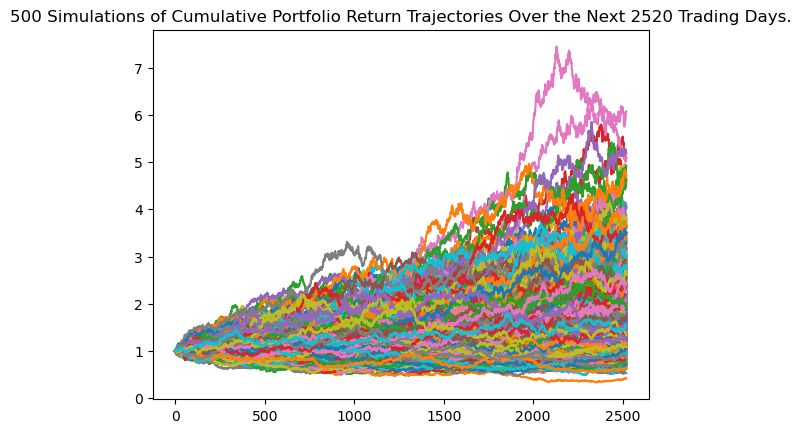

In [39]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot
# YOUR CODE HERE
mc_short.plot_simulation()

<Axes: title={'center': 'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

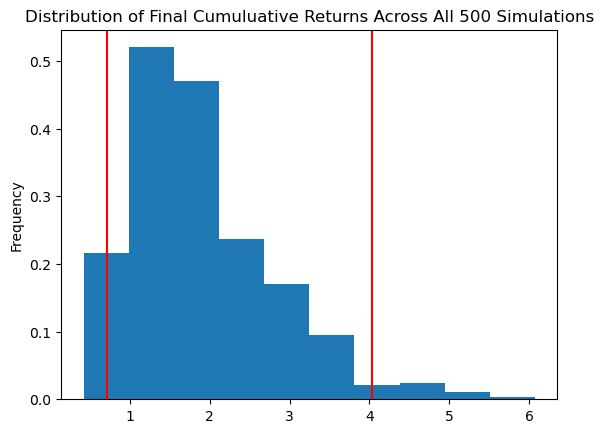

In [40]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
# YOUR CODE HERE
mc_short.plot_distribution()

In [41]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable
# YOUR CODE HERE
mc_short_summary = mc_short.summarize_cumulative_return()

# Review the 10-year Monte Carlo summary statistics
# YOUR CODE HERE
mc_short_summary

count           500.000000
mean              1.901317
std               0.904970
min               0.421327
25%               1.259098
50%               1.680043
75%               2.402093
max               6.073561
95% CI Lower      0.707184
95% CI Upper      4.037434
Name: 2520, dtype: float64

### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [42]:
# Print the current balance of the stock and bond portion of the members portfolio
# YOUR CODE HERE
total_stocks_bonds

67139.0

In [43]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_ten_cumulative_return = total_stocks_bonds * mc_short_summary[8]
ci_upper_ten_cumulative_return = total_stocks_bonds * mc_short_summary[9]

# Print the result of your calculations
# YOUR CODE HERE
print(f"There is a 95% chance that current {total_stocks_bonds: .02f} of stock/bond in the portfolio"
      f" with a 80% weight in SPY and 20%  weight in AGG over the next 10 years will end within in the range of"
      f" ${ci_lower_ten_cumulative_return: .02f} and ${ci_upper_ten_cumulative_return: .02f}.")

There is a 95% chance that current  67139.00 of stock/bond in the portfolio with a 80% weight in SPY and 20%  weight in AGG over the next 10 years will end within in the range of $ 47479.62 and $ 271069.28.


#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?